### **TEAM 6th SENSE**

RANDOM DATA GENERATION FOR IMAGINARY CLASSES P1, P2 AND P3

In [2]:
import pandas as pd
from datetime import datetime, timedelta
from random import randint

def generate_product_data(product_id, date_range, initial_inventory):
    data = {
        'Date': date_range,
        'Product_ID': [product_id] * len(date_range),
        'Demand': [randint(5, 200) for _ in range(len(date_range))]
    }
    inventory = [max(0, initial_inventory - sum(data['Demand'][:i+1])) for i in range(len(date_range))]
    data['Inventory'] = inventory
    return pd.DataFrame(data)

start_date = datetime(2023, 6, 1)
end_date = datetime(2023, 7, 31)
date_range = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]

initial_inventory_p1 = 10000
df_p1 = generate_product_data('P1', date_range, initial_inventory_p1)

initial_inventory_p2 = 4000
df_p2 = generate_product_data('P2', date_range, initial_inventory_p2)

initial_inventory_p3 = 7000
df_p3 = generate_product_data('P3', date_range, initial_inventory_p3)

df_combined = pd.concat([df_p1, df_p2, df_p3])

df_combined.to_csv('product_data.csv', index=False)

print(df_combined)


         Date Product_ID  Demand  Inventory
0  2023-06-01         P1      27       9973
1  2023-06-02         P1      52       9921
2  2023-06-03         P1     141       9780
3  2023-06-04         P1      40       9740
4  2023-06-05         P1      39       9701
..        ...        ...     ...        ...
56 2023-07-27         P3     105       1128
57 2023-07-28         P3      88       1040
58 2023-07-29         P3     130        910
59 2023-07-30         P3     128        782
60 2023-07-31         P3     175        607

[183 rows x 4 columns]


In [7]:
data = pd.read_csv("product_data2.csv")
#data = data.drop(columns=['Unnamed: 0'])
print(data.head())

         Date Product_ID  Demand  Inventory
0  2023-06-01         P1     140       9860
1  2023-06-02         P1     161       9699
2  2023-06-03         P1     182       9517
3  2023-06-04         P1     172       9345
4  2023-06-05         P1     180       9165


DEMAND PLOTS OVER THE PERIOD

In [1]:
import plotly.express as px


fig_demand_p1 = px.line(data[data['Product_ID'] == 'P1'], x='Date', y='Demand', title='Demand Over Time - Product P1')

fig_demand_p2 = px.line(data[data['Product_ID'] == 'P2'], x='Date', y='Demand', title='Demand Over Time - Product P2')

fig_demand_p3 = px.line(data[data['Product_ID'] == 'P3'], x='Date', y='Demand', title='Demand Over Time - Product P3')
fig_demand_p1.show()
fig_demand_p2.show()
fig_demand_p3.show()


NameError: name 'data' is not defined

INVENTORY PLOTS OVER THE PERIOD

In [9]:
import plotly.express as px

fig_inventory_p1 = px.line(data[data['Product_ID'] == 'P1'], x='Date', y='Inventory', title='Inventory Over Time - Product P1')

fig_inventory_p2 = px.line(data[data['Product_ID'] == 'P2'], x='Date', y='Inventory', title='Inventory Over Time - Product P2')

fig_inventory_p3 = px.line(data[data['Product_ID'] == 'P3'], x='Date', y='Inventory', title='Inventory Over Time - Product P3')

fig_inventory_p1.show()
fig_inventory_p2.show()
fig_inventory_p3.show()


ACF AND PACF PLOTS

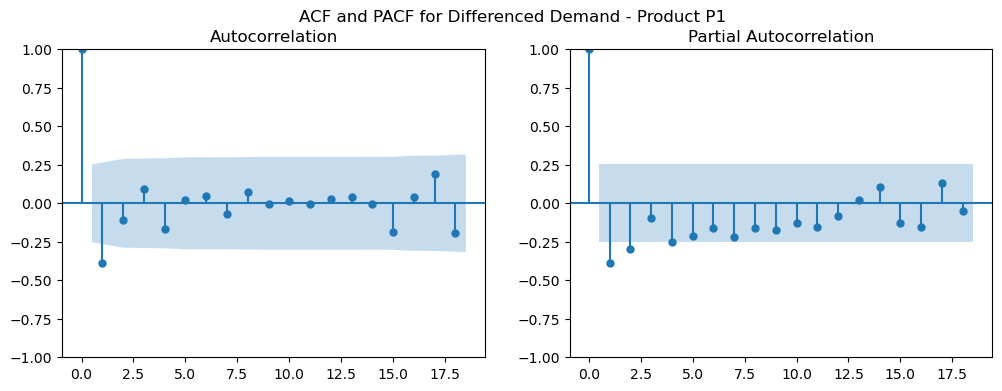

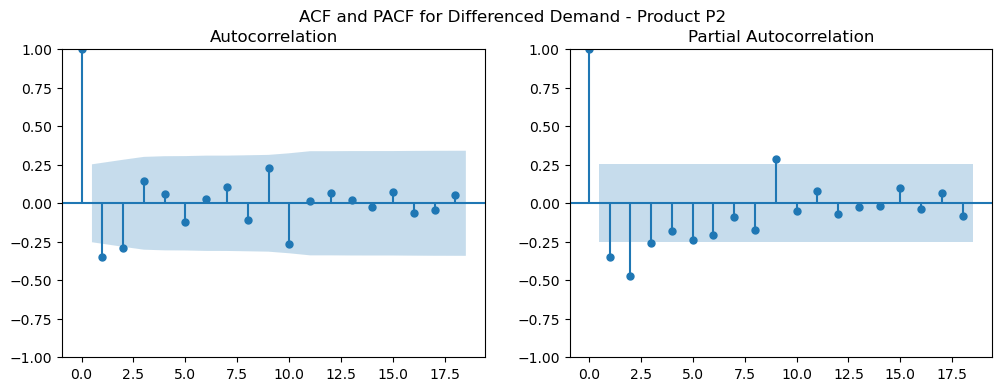

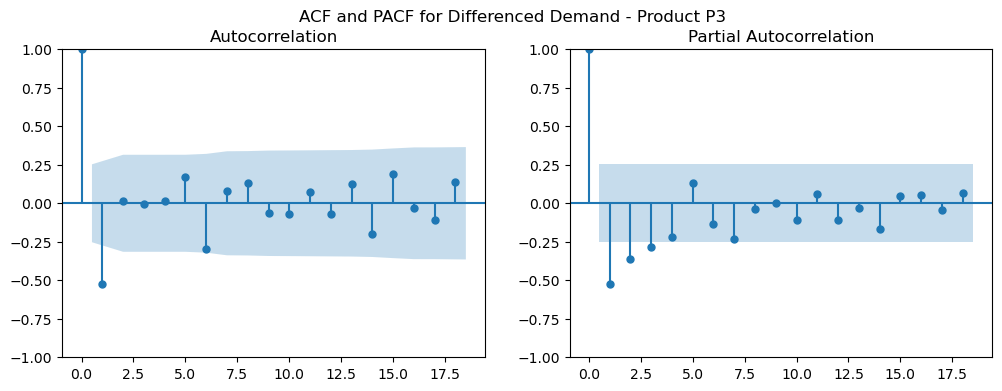

In [10]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

for product_id in data['Product_ID'].unique():
    product_data = data[data['Product_ID'] == product_id]

    time_series = product_data.set_index('Date')['Demand']

    differenced_series = time_series.diff().dropna()
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f'ACF and PACF for Differenced Demand - Product {product_id}')

    plot_acf(differenced_series, ax=axes[0])
    plot_pacf(differenced_series, ax=axes[1])

    plt.show()

PREDICTING FUTURE 5 DEMAND STEPS

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

for product_id in data['Product_ID'].unique():
    product_data = data[data['Product_ID'] == product_id]

    time_series = product_data.set_index('Date')['Demand']

    order = (1, 1, 1)
    seasonal_order = (1, 1, 1, 2)

    model = SARIMAX(time_series, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=True)

    future_steps = 5
    predictions = model_fit.predict(len(time_series), len(time_series) + future_steps - 1)
    predictions = predictions.astype(int)

    print(f'Product {product_id} - Predicted Demand for the Next {future_steps} Steps:')
    print(predictions)
    print()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Product P1 - Predicted Demand for the Next 5 Steps:
2023-08-01     98
2023-08-02     92
2023-08-03    105
2023-08-04     91
2023-08-05    104
Freq: D, Name: predicted_mean, dtype: int32

Product P2 - Predicted Demand for the Next 5 Steps:
2023-08-01     85
2023-08-02     90
2023-08-03    107
2023-08-04    117
2023-08-05    100
Freq: D, Name: predicted_mean, dtype: int32

Product P3 - Predicted Demand for the Next 5 Steps:
2023-08-01    71
2023-08-02    73
2023-08-03    68
2023-08-04    71
2023-08-05    66
Freq: D, Name: predicted_mean, dtype: int32



C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Optimal Order Quantity, Reorder Point, Safety Stock & Total Cost

In [12]:
import numpy as np


def calculate_inventory_metrics_with_remaining(data, product_id, initial_inventory):
    product_data = data[data['Product_ID'] == product_id]

    time_series = product_data.set_index('Date')['Demand']

    order = (1, 1, 1)
    seasonal_order = (1, 1, 1, 2)

    model = SARIMAX(time_series, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=True)

    future_steps = 5
    predictions = model_fit.predict(len(time_series), len(time_series) + future_steps - 1)
    predictions = predictions.astype(int)

    future_dates = pd.date_range(start=time_series.index[-1] + pd.DateOffset(days=1), periods=future_steps, freq='D')
    forecasted_demand = pd.Series(predictions, index=future_dates)
    lead_time = 1
    service_level = 0.95
    z = np.abs(np.percentile(forecasted_demand, 100 * (1 - service_level)))
    order_quantity = np.ceil(forecasted_demand.mean() + z).astype(int)
    reorder_point = forecasted_demand.mean() * lead_time + z
    safety_stock = reorder_point - forecasted_demand.mean() * lead_time
    holding_cost = 20
    stockout_cost = 70
    total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity)
    total_stockout_cost = stockout_cost * np.maximum(0, forecasted_demand.mean() * lead_time - initial_inventory)
    total_cost = total_holding_cost + total_stockout_cost

    remaining_inventory = max(0, initial_inventory - sum(forecasted_demand))


    print(f'Inventory Metrics for Product {product_id}:')
    print("Optimal Order Quantity:", order_quantity)
    print("Reorder Point:", reorder_point)
    print("Safety Stock:", safety_stock)
    print("Total Cost:", total_cost)
    print("Remaining Inventory Stock:", remaining_inventory)
    print()

initial_inventory_dict = {'P1': 10000, 'P2': 4000, 'P3': 7000}

for product_id, initial_inventory in initial_inventory_dict.items():
    calculate_inventory_metrics_with_remaining(data, product_id, initial_inventory)


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Inventory Metrics for Product P1:
Optimal Order Quantity: 190
Reorder Point: 189.2
Safety Stock: 91.19999999999999
Total Cost: 201900.0
Remaining Inventory Stock: 9510

Inventory Metrics for Product P2:
Optimal Order Quantity: 186
Reorder Point: 185.8
Safety Stock: 86.00000000000001
Total Cost: 81860.0
Remaining Inventory Stock: 3501

Inventory Metrics for Product P3:
Optimal Order Quantity: 137
Reorder Point: 136.2
Safety Stock: 66.39999999999999
Total Cost: 141370.0
Remaining Inventory Stock: 6651



C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

